# Actividad NLP - 2.0 - Aplicación de Análisis de Sentimientos
### Karla González Sánchez - A01514526

El objetivo de esta actividad es realizar un análisis de sentimientos que involucra dos tareas principales: la selección de un corpus de texto y la aplicación de un modelo preentrenado de "sentiment analysis" para analizar las reacciones a una una aplicación.

Para esta tarea, se ha utilizado el dataset "**app_reviews**". El cual se descargó de la página de Hugging Face, que se encuentra disponible en el siguiente enlace: https://huggingface.co/datasets/app_reviews

In [103]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

### Importar bibliotecas necesarias

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


False

In [105]:
df = pd.read_csv("reviews.csv")

In [106]:
df.head()

,id,package_name,review,date,star,version_id
0,7bd227d9-afc9-11e6-aba1-c4b301cdf627,com.mantz_it.rfanalyzer,Great app! The new version now works on my Bravia Android TV which is great as it's right by my rooftop aerial cable. The scan feature would be useful...any ETA on when this will be available? Also the option to import a list of bookmarks e.g. from a simple properties file would be useful.,October 12 2016,4,1487
1,7bd22905-afc9-11e6-a5dc-c4b301cdf627,com.mantz_it.rfanalyzer,Great It's not fully optimised and has some issues with crashing but still a nice app especially considering the price and it's open source.,August 23 2016,4,1487
2,7bd2299c-afc9-11e6-85d6-c4b301cdf627,com.mantz_it.rfanalyzer,Works on a Nexus 6p I'm still messing around with my hackrf but it works with my Nexus 6p Trond usb-c to usb host adapter. Thanks!,August 04 2016,5,1487
3,7bd22a26-afc9-11e6-9309-c4b301cdf627,com.mantz_it.rfanalyzer,The bandwidth seemed to be limited to maximum 2 MHz or so. I tried to increase the bandwidth but not possible. I purchased this is because one of the pictures in the advertisement showed the 2.4GHz band with around 10MHz or more bandwidth. Is it not possible to increase the bandwidth? If not it is just the same performance as other free APPs.,July 25 2016,3,1487
4,7bd22aba-afc9-11e6-8293-c4b301cdf627,com.mantz_it.rfanalyzer,Works well with my Hackrf Hopefully new updates will arrive for extra functions,July 22 2016,5,1487


Gráfico de barras que muestra la distribución de las estrellas que los usuarios le dieron a la aplicación.
Donde podemos ver que la gran mayoría de las puntuaciones dadas son de 5 estrellas.

Text(0, 0.5, 'Numero de usuarios')

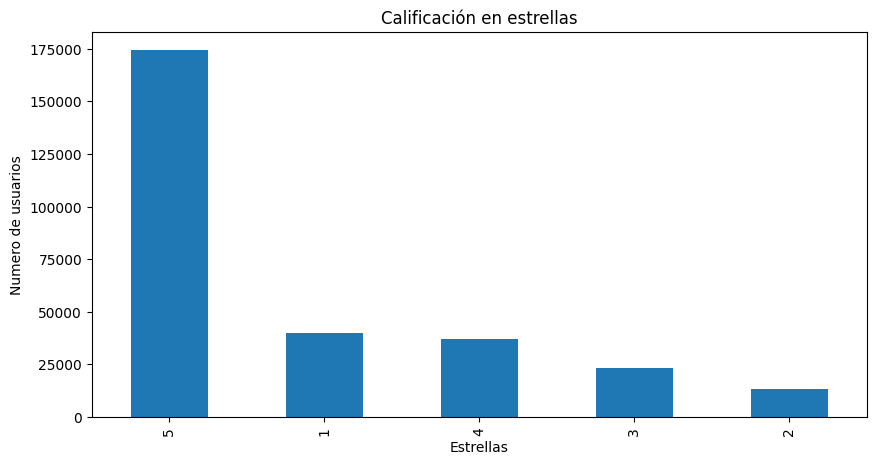

In [107]:
ax = df['star'].value_counts().plot(kind='bar', 
                                    title='Calificación en estrellas', 
                                    figsize=(10, 5))

ax.set_xlabel('Estrellas')
ax.set_ylabel('Numero de usuarios')

### NLTK

In [108]:
# Se define como ejemplo la reseña numero 50
example = df['review'][50]
print(example)

Great App - Snags with Kitkat Worked fine on Jellybean but started throwing snags after upgrade. Will try logging and send it to the Author...


In [109]:
# Se divide la reseña en tokens o palabras individuales, y los primeros 10 tokens se imprimen en la pantalla.
tokens = nltk.word_tokenize(example)
print(tokens[:10])

['Great', 'App', '-', 'Snags', 'with', 'Kitkat', 'Worked', 'fine', 'on', 'Jellybean']


In [110]:
# Se asigna una etiqueta POS (como sustantivo, verbo, adjetivo, etc.) a cada token. Los primeros 10 tokens etiquetados se imprimen.
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Great', 'NNP'),
 ('App', 'NNP'),
 ('-', ':'),
 ('Snags', 'NN'),
 ('with', 'IN'),
 ('Kitkat', 'NNP'),
 ('Worked', 'NNP'),
 ('fine', 'NN'),
 ('on', 'IN'),
 ('Jellybean', 'NNP')]

In [111]:
# Etiquetado de entidades en el texto tokenizado y etiquetado previamente.
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Great/NNP)
  (PERSON App/NNP)
  -/:
  (PERSON Snags/NN)
  with/IN
  (PERSON Kitkat/NNP Worked/NNP)
  fine/NN
  on/IN
  Jellybean/NNP
  but/CC
  started/VBD
  throwing/VBG
  snags/NNS
  after/IN
  upgrade/NN
  ./.
  Will/MD
  try/VB
  logging/NN
  and/CC
  send/VB
  it/PRP
  to/TO
  the/DT
  (ORGANIZATION Author/NN)
  .../:)


### VADER

- Eliminación de palabras vacías (stop words): Se eliminan las palabras comunes y vacías del texto.

- Puntuación de cada palabra: Cada palabra en el texto se evalúa individualmente y se le asigna una puntuación de sentimiento, (positiva, negativa o neutral).

- Combinación de puntuaciones, donde un valor igual a cero se considera neutral, un valor mayor a cero se considera positivo, y un valor menor a cero se considera negativo.

In [112]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# Para realizar análisis de sentimiento
sia = SentimentIntensityAnalyzer()

Se aplica el análisis de sentimiento a una reseña de ejemplo llamada `example`, lo que genera una puntuación de sentimiento para esa reseña en términos de positividad, negatividad, neutralidad y una puntuación compuesta.

Recordemos que la reseña de ejemplo es este:
"Great App - Snags with Kitkat Worked fine on Jellybean but started throwing snags after upgrade. Will try logging and send it to the Author..."

El análisis de sentimiento le da un mayor puntaje a que es una aseveración neutra, aunque la puntación compuesta nos indica que es positiva. 

In [113]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'compound': 0.4497}

Se ejecuta el análisis de sentimiento en todo el conjunto de datos, iterando a través de cada reseña en el DataFrame. Las puntuaciones de sentimiento resultantes se almacenan en un diccionario res, donde la clave es el identificador id de la reseña.

In [114]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
  review = row['review']
  myid = row['id']
  res[myid] = sia.polarity_scores(review)

  0%|          | 0/288065 [00:00<?, ?it/s]

In [115]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {'index': 'id'})
vaders = vaders.merge(df, how = 'left')

In [116]:
vaders.head()

,id,neg,neu,pos,compound,package_name,review,date,star,version_id
0,7bd227d9-afc9-11e6-aba1-c4b301cdf627,0.000,0.811,0.189,0.9080,com.mantz_it.rfanalyzer,Great app! The new version now works on my Bravia Android TV which is great as it's right by my rooftop aerial cable. The scan feature would be useful...any ETA on when this will be available? Also the option to import a list of bookmarks e.g. from a simple properties file would be useful.,October 12 2016,4,1487
1,7bd22905-afc9-11e6-a5dc-c4b301cdf627,0.062,0.715,0.223,0.6718,com.mantz_it.rfanalyzer,Great It's not fully optimised and has some issues with crashing but still a nice app especially considering the price and it's open source.,August 23 2016,4,1487
2,7bd2299c-afc9-11e6-85d6-c4b301cdf627,0.000,0.853,0.147,0.6300,com.mantz_it.rfanalyzer,Works on a Nexus 6p I'm still messing around with my hackrf but it works with my Nexus 6p Trond usb-c to usb host adapter. Thanks!,August 04 2016,5,1487
3,7bd22a26-afc9-11e6-9309-c4b301cdf627,0.022,0.835,0.143,0.8453,com.mantz_it.rfanalyzer,The bandwidth seemed to be limited to maximum 2 MHz or so. I tried to increase the bandwidth but not possible. I purchased this is because one of the pictures in the advertisement showed the 2.4GHz band with around 10MHz or more bandwidth. Is it not possible to increase the bandwidth? If not it is just the same performance as other free APPs.,July 25 2016,3,1487
4,7bd22aba-afc9-11e6-8293-c4b301cdf627,0.000,0.696,0.304,0.5859,com.mantz_it.rfanalyzer,Works well with my Hackrf Hopefully new updates will arrive for extra functions,July 22 2016,5,1487


### Resultados 

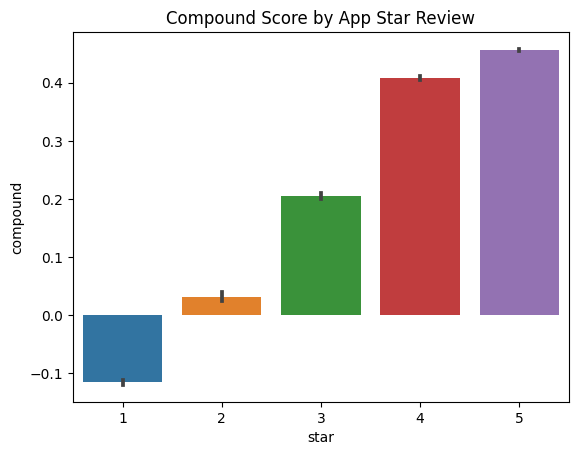

In [124]:
# Relación entre la puntuación compuesta de las reseñas y las calificaciones de las aplicaciones.
ax = sns.barplot(data = vaders, x='star', y='compound')
ax.set_title('Compound Score by App Star Review')
plt.show()

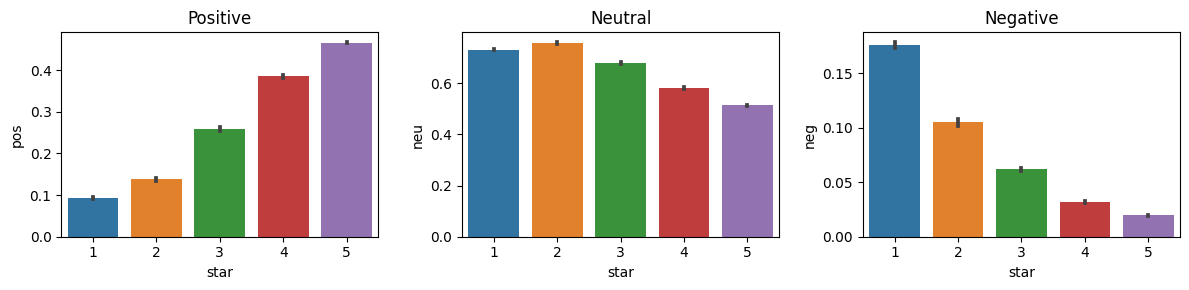

In [118]:
# Relación entre las calificaciones de las aplicaciones y las puntuaciones de sentimiento positivas, neutrales y negativas
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='star', y = 'pos', ax = axs[0])
sns.barplot(data=vaders, x='star', y = 'neu', ax = axs[1])
sns.barplot(data=vaders, x='star', y = 'neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

### Top 5 reseñas con mayor connotación positiva

In [126]:
top_positive_reviews = vaders.nlargest(5, 'compound')
top_positive_reviews

,id,neg,neu,pos,compound,package_name,review,date,star,version_id
39525,7bef224a-afc9-11e6-95f1-c4b301cdf627,0.0,0.000,1.000,0.9998,org.kde.necessitas.ministro,Lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol,December 16 2014,5,643
39732,7befab8a-afc9-11e6-a9e8-c4b301cdf627,0.0,0.000,1.000,0.9998,org.kde.necessitas.ministro,Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good Good,July 31 2014,5,642
39869,7bf006b8-afc9-11e6-8e7f-c4b301cdf627,0.0,0.009,0.991,0.9997,org.kde.necessitas.ministro,Great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great. Copping 6 users( lol ),April 30 2014,5,642
39658,7bef6775-afc9-11e6-9128-c4b301cdf627,0.0,0.000,1.000,0.9996,org.kde.necessitas.ministro,Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great Great,September 13 2014,5,642
39688,7bef8d6e-afc9-11e6-a00f-c4b301cdf627,0.0,0.000,1.000,0.9996,org.kde.necessitas.ministro,Wow Wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow wow,August 26 2014,5,642


### Top 5 reseñas con mayor connotación negativa

In [127]:
top_negative_reviews = vaders.nsmallest(5, 'compound')
top_negative_reviews

,id,neg,neu,pos,compound,package_name,review,date,star,version_id
276804,95fa545a-2f96-11e7-8be7-000c29dba5da,0.740,0.260,0.000,-0.9998,com.google.android.gms,Its very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad Not download not download not download not download,May 02 2017,1,1230
103269,7c33ca75-afc9-11e6-981e-c4b301cdf627,0.961,0.030,0.010,-0.9997,com.tmarki.comicmaker,It crashed Right in a middle of a good comic it crashed:-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-( :-(,May 17 2015,1,735
169590,4cfa9187-b00a-11e6-be22-b252784303c8,0.911,0.072,0.017,-0.9994,net.sourceforge.opencamera,Sucks Don't Download this junk app it's nothing but waste of time and MB. It sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks Sucks.,August 17 2016,1,289
269128,811308dd-2881-11e7-80ae-000c29dba5da,1.000,0.000,0.000,-0.9985,com.google.android.gms,HATE HATE HATE HATE HATE HATE HATE HATE HATE HATE HATE HATE HATE HATE HATE HATE HATE HATE HATE HATE HATE HATE HATE HATE HATE HATE,April 23 2017,1,1230
39527,7bef23a6-afc9-11e6-b86a-c4b301cdf627,0.937,0.063,0.000,-0.9971,org.kde.necessitas.ministro,YOU DON'T EVEN DESERVE 1 STAR FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE,December 16 2014,1,643
